<a href="https://colab.research.google.com/github/ChrisNoronha/1lista/blob/main/C%C3%B3pia_de_Profiling_indicador2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://ucb.catolica.edu.br/hubfs/SITE/logo__catolica--footer.svg)

## Novas Tecnologias

Grupo: Christian Picoli, Efraim de Jesus

Professor: Remis Balaniuk, 2024


# Análise exploratória e profiling de dados

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=7e1db0d693b61949bcfb8ab423a73aa6006727a9ed0d21de909aa52a8d383706
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import ydata_profiling
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

In [ ]:
import pandas as pd

data = pd.read_csv('Indicador__2010.csv', encoding='latin1', on_bad_lines='skip', sep=";")
data.head()


,Ano,Programa,Identificador_Unico,Descricao,Unidade_Medida,Periodicidade,Base_Geografica,Fonte,Fórmula_Calculo,Valor_Referencia,...,Periodo_04,Periodo_05,Periodo_06,Periodo_07,Periodo_08,Periodo_09,Periodo_10,Periodo_11,Periodo_12,Comentarios
0,2010,16,2834,Taxa de Adesão dos Estados ao Pacto pela Saúde,%,Anual,Nacional,MS/SE/DAD,Número de UF com Termo de Compromisso de Gestã...,"44,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
1,2010,16,2835,Taxa de Adesão dos Municípios ao Pacto pela Saúde,%,Anual,Nacional,MS/DAD/MS,Nímero de municípios com o Termo de Compromiss...,"5,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
2,2010,16,2836,Taxa de Constituição dos Colegiados de Gestão ...,%,Anual,Nacional,MS/SE/DAD,Número de Colegiados de Gestão Regional reconh...,"12,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
3,2010,16,2837,Taxa de Planos Municipais de Saúde Aprovados p...,%,Anual,Nacional,MS/SE/SPO/CGPL,Número de municípios com plano de saúde aprova...,"49,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
4,2010,16,2838,Taxa de Planos Estaduais de Saúde Aprovados pe...,%,Anual,Nacional,MS/SPO/CGPL,Número de UF com plano estadual parovado pelo ...,"80,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 869 entries, ('2010;"0016";"2834";"Taxa de Adesão dos Estados ao Pacto pela Saúde";"%";"Anual";"Nacional";"MS/SE/DAD";"Número de UF com Termo de Compromisso de Gestão Estadual Homologado na Comissão Intergestores Tripartite dividido pelo número total de UF', ' multiplicado por 100."; 44', '0;2007; 0', '0; 100', '0; 100', '0; 0', '0; 0', '0; 0', '0; 0', '0; 0', '0; 0', '0; 0', '0; 0', '0; 0', '0; 0', '0; 0') to ('Estão sendo realizados estudos com a finalidade de definir e parametrizar indicadores de desempenho', ' controláveis e quantificáveis', ' voltados para mensurar', ' acompanhar e avaliar sistematicamente os programas geridos pelo Ministério', ' entre eles os indicadores de desempenho relativos à mobilidade urbana."', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                      

In [ ]:
data.dtypes

Ano;"Programa";"Identificador_Unico";"Descricao";"Unidade_Medida";"Periodicidade";"Base_Geografica";"Fonte";"Fórmula_Calculo";Valor_Referencia;Data_Referencia;Valor_Final_PPA;Valor_Previsto_no_Ano;Periodo_01;Periodo_02;Periodo_03;Periodo_04;Periodo_05;Periodo_06;Periodo_07;Periodo_08;Periodo_09;Periodo_10;Periodo_11;Periodo_12;"Comentarios"    object
dtype: object

In [ ]:
def obtem_categoria(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numérico'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Data'
    elif unique_count==total_count:
        return 'Texto'
    else:
        return 'Categórico'

def print_categorias(df):
    for column_name in df.columns:
        print(column_name, ": ", obtem_categoria(df[column_name]))

In [ ]:
print_categorias(data)

Ano;"Programa";"Identificador_Unico";"Descricao";"Unidade_Medida";"Periodicidade";"Base_Geografica";"Fonte";"Fórmula_Calculo";Valor_Referencia;Data_Referencia;Valor_Final_PPA;Valor_Previsto_no_Ano;Periodo_01;Periodo_02;Periodo_03;Periodo_04;Periodo_05;Periodo_06;Periodo_07;Periodo_08;Periodo_09;Periodo_10;Periodo_11;Periodo_12;"Comentarios" :  Categórico


Note que o read_csv não conseguiu identificar a coluna date como sendo uma data. Isso acontece pois esse método só consegue distinguir números de strings.

Para obter o tipo correto nas datas utilize o método to_datetime:

In [ ]:
print_categorias(data)

Ano;"Programa";"Identificador_Unico";"Descricao";"Unidade_Medida";"Periodicidade";"Base_Geografica";"Fonte";"Fórmula_Calculo";Valor_Referencia;Data_Referencia;Valor_Final_PPA;Valor_Previsto_no_Ano;Periodo_01;Periodo_02;Periodo_03;Periodo_04;Periodo_05;Periodo_06;Periodo_07;Periodo_08;Periodo_09;Periodo_10;Periodo_11;Periodo_12;"Comentarios" :  Categórico


## Tamanho da base


A função len conta o número de observações em uma série. A função contará todas as observações, independentemente de haver valores ausentes ou nulos.


In [ ]:
tamanho = len(data)
tamanho

746

## Contagem


A função count retornará o número de observações não-NA / não-nulas em uma série.

In [ ]:
data = pd.read_csv('Indicador__2010.csv', encoding='latin1', sep=';')
print(data.columns)


Index(['Ano', 'Programa', 'Identificador_Unico', 'Descricao', 'Unidade_Medida',
       'Periodicidade', 'Base_Geografica', 'Fonte', 'Fórmula_Calculo',
       'Valor_Referencia', 'Data_Referencia', 'Valor_Final_PPA',
       'Valor_Previsto_no_Ano', 'Periodo_01', 'Periodo_02', 'Periodo_03',
       'Periodo_04', 'Periodo_05', 'Periodo_06', 'Periodo_07', 'Periodo_08',
       'Periodo_09', 'Periodo_10', 'Periodo_11', 'Periodo_12', 'Comentarios'],
      dtype='object')


In [ ]:
base_geografica_counts = data['Base_Geografica'].value_counts()

print(base_geografica_counts)


Base_Geografica
Nacional                        553
Por Eixos de Desenvolvimento     56
Regional                         55
Estadual                         45
Municipal                        28
A Definir                         7
Amazônia Legal                    1
Não Informado                     1
Name: count, dtype: int64


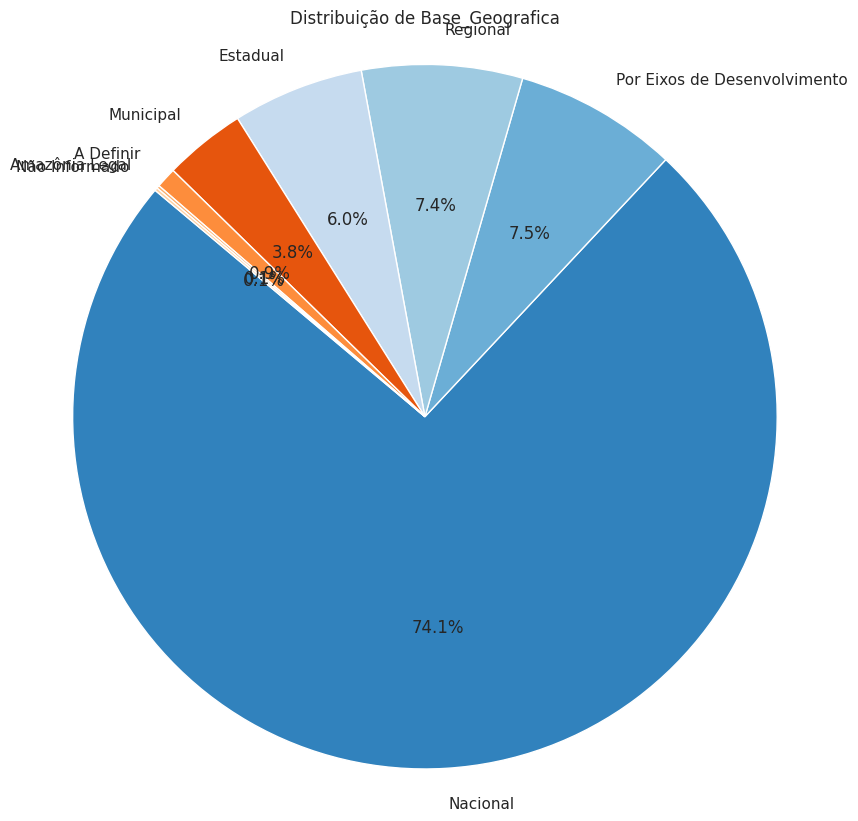

In [ ]:
import matplotlib.pyplot as plt

labels = base_geografica_counts.index
sizes = base_geografica_counts.values
colors = plt.get_cmap('tab20c').colors

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Base_Geografica')
plt.axis('equal')
plt.show()


In [ ]:
data

,Ano,Programa,Identificador_Unico,Descricao,Unidade_Medida,Periodicidade,Base_Geografica,Fonte,Fórmula_Calculo,Valor_Referencia,...,Periodo_04,Periodo_05,Periodo_06,Periodo_07,Periodo_08,Periodo_09,Periodo_10,Periodo_11,Periodo_12,Comentarios
0,2010,16,2834,Taxa de Adesão dos Estados ao Pacto pela Saúde,%,Anual,Nacional,MS/SE/DAD,Número de UF com Termo de Compromisso de Gestã...,"44,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
1,2010,16,2835,Taxa de Adesão dos Municípios ao Pacto pela Saúde,%,Anual,Nacional,MS/DAD/MS,Nímero de municípios com o Termo de Compromiss...,"5,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
2,2010,16,2836,Taxa de Constituição dos Colegiados de Gestão ...,%,Anual,Nacional,MS/SE/DAD,Número de Colegiados de Gestão Regional reconh...,"12,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
3,2010,16,2837,Taxa de Planos Municipais de Saúde Aprovados p...,%,Anual,Nacional,MS/SE/SPO/CGPL,Número de municípios com plano de saúde aprova...,"49,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
4,2010,16,2838,Taxa de Planos Estaduais de Saúde Aprovados pe...,%,Anual,Nacional,MS/SPO/CGPL,Número de UF com plano estadual parovado pelo ...,"80,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Não Informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2010,8768,646,Idade Média da Frota - Navegação Interior,ANO,Anual,Nacional,FMM,Relação entre o somatório do número de anos de...,"0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Estamos estudando um melhor índice a ser aplic...
742,2010,8768,647,Taxa de Participação do Modal Aquaviário na Ma...,PERCENTAGEM,Anual,Nacional,FMM,Relação percentual entre a composição da carga...,"0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Estamos estudando um melhor índice a ser aplic...
743,2010,9989,1414,Coeficiente de Mobilidade Urbana,viagens ao dia/habitante,Anual,Nacional,Secretaria Nacional de Transporte e Mobilidade...,Relação entre o número de viagens realizadas a...,"1,5",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",O indicador do programa não está sendo apurado...
744,2010,9991,2895,Déficit Habitacional Quantitativo de Famílias ...,UNIDADE,Anual,Nacional,Ministério das Cidades/Fundação João Pinheiro/...,"Somatório dos domicílios improvisados, coabita...","7136137,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",O último indíce apurado se refere ao ano de 20...


In [ ]:

base_geografica_counts = data['Base_Geografica'].value_counts(dropna=False)

num_missing = data['Base_Geografica'].isna().sum()

print(base_geografica_counts)
print(f'Ausentes: {num_missing}')


Base_Geografica
Nacional                        553
Por Eixos de Desenvolvimento     56
Regional                         55
Estadual                         45
Municipal                        28
A Definir                         7
Amazônia Legal                    1
Não Informado                     1
Name: count, dtype: int64
Ausentes: 0


## Valor mínimo / máximo

O valor mínimo e máximo de um conjunto de dados pode ser facilmente obtido com a função min e max em uma série.

In [ ]:
print("Mínimo de ativos passivos associados: ", data['Valor_Final_PPA'].min())
print("Máximo de ativos passivos associados: ", data['Valor_Final_PPA'].max())

Mínimo de ativos passivos associados:   0,0
Máximo de ativos passivos associados:   97,78


## Moda
A moda é o valor mais frequente em um conjunto de dados. Pode ser obtido usando a função mode em uma série. Se aplica tanto a valores numéricos quanto categóricos.

In [ ]:
print("Data referência mais frequente nos indicadores",data["Data_Referencia"].mode())

Data referência mais frequente nos indicadores 0    2006
Name: Data_Referencia, dtype: int64



## Média aritmética

A média é uma medida de tendência central. Representa a soma dos valores divididos pela contagem de observações não ausentes.

Pode ser obtido com a função mean em uma série.

In [ ]:
print(data['Periodo_01'].head(50))

print(data['Periodo_01'].unique())


0         100.00
1          73.40
2          91.62
3          49.00
4          80.00
5         320.00
6           5.60
7          79.53
8          89.41
9          55.32
10         96.16
11         76.00
12         16.00
13         29.00
14          9.00
15         36.44
16         16.35
17          0.00
18          6.50
19         19.06
20         34.00
21         96.80
22         71.00
23        199.59
24        146.04
25         72.45
26         96.61
27        233.28
28        121.30
29         69.52
30          1.66
31         91.66
32         80.12
33    1860082.00
34          0.00
35       2617.00
36          0.00
37         93.50
38         80.40
39         34.60
40         72.34
41          8.26
42         69.20
43         57.40
44         22.92
45        432.00
46         41.90
47         14.86
48         97.70
49         97.00
Name: Periodo_01, dtype: float64
[ 1.00000000e+02  7.34000000e+01  9.16200000e+01  4.90000000e+01
  8.00000000e+01  3.20000000e+02  5.60000000e+00  7.

In [ ]:
valores = data['Periodo_01'].values

print(valores[:50])


[1.000000e+02 7.340000e+01 9.162000e+01 4.900000e+01 8.000000e+01
 3.200000e+02 5.600000e+00 7.953000e+01 8.941000e+01 5.532000e+01
 9.616000e+01 7.600000e+01 1.600000e+01 2.900000e+01 9.000000e+00
 3.644000e+01 1.635000e+01 0.000000e+00 6.500000e+00 1.906000e+01
 3.400000e+01 9.680000e+01 7.100000e+01 1.995900e+02 1.460400e+02
 7.245000e+01 9.661000e+01 2.332800e+02 1.213000e+02 6.952000e+01
 1.660000e+00 9.166000e+01 8.012000e+01 1.860082e+06 0.000000e+00
 2.617000e+03 0.000000e+00 9.350000e+01 8.040000e+01 3.460000e+01
 7.234000e+01 8.260000e+00 6.920000e+01 5.740000e+01 2.292000e+01
 4.320000e+02 4.190000e+01 1.486000e+01 9.770000e+01 9.700000e+01]


In [ ]:
media_valor_referencia = data['Periodo_01'].mean()

print(f'Média do primeiro período: {media_valor_referencia}')

Média do primeiro período: 761254429.7212881


##  Mediana

A mediana também é uma medida de tendência central. É o número exatamente no meio de uma lista ordenada de valores numéricos.

In [ ]:
print(data['Periodo_01'].median())

27.845


In [ ]:
print(data['Periodo_01'].std())

20780392397.71826


In [ ]:
data['Identificador_Unico'].quantile([.25, .5, .75])

0.25    1830.25
0.50    2559.50
0.75    2922.75
Name: Identificador_Unico, dtype: float64

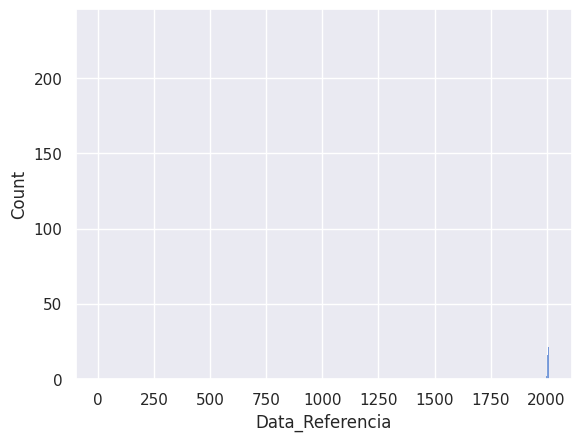

In [ ]:
sns.histplot(data['Data_Referencia'].dropna());